종합실습. 산불화재 대응 시스템
* NASA API : https://eonet.gsfc.nasa.gov/api/v3/events
    - Category ID : wild fires
* NASA 위성지도 : https://wvs.earthdata.nasa.gov/?LAYERS=MODIS_Terra_CorrectedReflectance_TrueColor,MODIS_Terra_Thermal_Anomalies_Day&CRS=EPSG:4326&COORDINATES=35,125,38,128&FORMAT=image/jpeg&AUTOSCALE=TRUE&RESOLUTION=10km


In [ ]:
# 1) 산불데이터 수집
#     : NASA API로 산불 발생 데이터 수집 (기간:올해(기본값), 전세계 대상)
# 2) 산불데이터 지도 시각화
#     : 지도에 재난 발생 위치를 표시
#     : Heatmap으로 피해 지역 시각화 및 분석
#       (히트맵 : from folium.plugins import HeatMap 사용)
#       ㄴ> folium 공식 홈페이지 > user guide > plugins
# 3) (선택) 영상처리
#     : 위성 이미지 분석 : OpenCV로 산불 확산 경로 파악
#     : 객체 감지로 특정 피해 상황 강조

In [51]:
# 라이브러리
import pandas as pd
import folium, requests
from folium.plugins import HeatMap
from geojson import Feature, FeatureCollection, Point


In [93]:
# 1) 산불 데이터 수집 
api_url = "https://eonet.gsfc.nasa.gov/api/v3/categories/wildfires?&status=open&days=30"
params={
    'category':'wildfires',
    'status':"open",
    'days':"20",
    # 'limit' : 5
}
def get_wildfires_data(api_url):
    url = api_url
    res = requests.get(url)
    if res.status_code == 200:
        return res.json()
    else:
        return None

raw_data = get_wildfires_data(api_url)
raw_data


{'title': 'EONET Events: Wildfires',
 'description': 'Wildfires includes all nature of fire, including forest and plains fires, as well as urban and industrial fire events. Fires may be naturally caused or manmade.',
 'link': 'https://eonet.gsfc.nasa.gov/api/v3/categories/wildfires',
 'events': [{'id': 'EONET_12148',
   'title': 'Rx Lamar 3440 Wildfire, Lamar, Texas',
   'description': None,
   'link': 'https://eonet.gsfc.nasa.gov/api/v3/events/EONET_12148',
   'closed': None,
   'categories': [{'id': 'wildfires', 'title': 'Wildfires'}],
   'sources': [{'id': 'IRWIN', 'url': 'https://irwin.doi.gov/observer/'}],
   'geometry': [{'magnitudeValue': 500.0,
     'magnitudeUnit': 'acres',
     'date': '2024-12-16T09:29:00Z',
     'type': 'Point',
     'coordinates': [-95.5874, 33.8451]}]},
  {'id': 'EONET_12147',
   'title': 'Soap Wildfire, Yavapai, Arizona',
   'description': None,
   'link': 'https://eonet.gsfc.nasa.gov/api/v3/events/EONET_12147',
   'closed': None,
   'categories': [{'id'

In [94]:


# event > title, geometry(magnitudeValue, magnitudeUnit, date, coordinates[])

# for key, value in raw_data['events'] : 
#     print(key, value)
"""
{'title': 'EONET Events', 
 'description': 'Natural events from EONET.', 
 'link': 'https://eonet.gsfc.nasa.gov/api/v3/events', 
 'events': [{'id': 'EONET_12148', 
             'title': 'Rx Lamar 3440 Wildfire, Lamar, Texas', 
             'description': None, 
             'link': 'https://eonet.gsfc.nasa.gov/api/v3/events/EONET_12148', 
             'closed': None, 
             'categories': [{'id': 'wildfires', 'title': 'Wildfires'}], 
             'sources': [{'id': 'IRWIN', 'url': 'https://irwin.doi.gov/observer/'}], 
             'geometry': [{'magnitudeValue': 500.0, 
                           'magnitudeUnit': 'acres', 
                           'date': '2024-12-16T09:29:00Z', 
                           'type': 'Point', 
                           'coordinates': [-95.5874, 33.8451]
                           }]
            }, 
"""
features=[]
for event in raw_data['events']:
    i=0
    title = event.get('title')
    geometrices = event.get('geometry', [])

    for geom in geometrices:
        magni_value = geom.get('magnitudeValue')
        magni_unit = geom.get('magnitudeUnit')
        date = geom.get('date')
        lon = geom.get('coordinates')[0]
        lat = geom.get('coordinates')[1]

    features.extend([Feature(geometry=Point((lon, lat)), 
                            properties={'Title':title, 
                                        'MagnitudeValue':magni_value, 
                                        "MagnitudeUnit":magni_unit,
                                        "Date":date})])
    i+=1
features


# title : Rx Lamar 3440 Wildfire, Lamar, Texas
# magni_value : 500.0
# magni_unit : acres
# date : 2024-12-16T09:29:00Z
# lon : -95.5874
# lat : 33.8451

[{"geometry": {"coordinates": [-95.5874, 33.8451], "type": "Point"}, "properties": {"Date": "2024-12-16T09:29:00Z", "MagnitudeUnit": "acres", "MagnitudeValue": 500.0, "Title": "Rx Lamar 3440 Wildfire, Lamar, Texas"}, "type": "Feature"},
 {"geometry": {"coordinates": [-112.200767, 34.088933], "type": "Point"}, "properties": {"Date": "2024-12-15T15:55:00Z", "MagnitudeUnit": "acres", "MagnitudeValue": 1000.0, "Title": "Soap Wildfire, Yavapai, Arizona"}, "type": "Feature"},
 {"geometry": {"coordinates": [-81.332645, 27.669495], "type": "Point"}, "properties": {"Date": "2024-12-15T15:55:00Z", "MagnitudeUnit": "acres", "MagnitudeValue": 1035.0, "Title": "APQ Rec Area 4 Rx 1215 Wildfire, Polk, Florida"}, "type": "Feature"},
 {"geometry": {"coordinates": [12.542507, 13.871898], "type": "Point"}, "properties": {"Date": "2024-12-13T19:00:00Z", "MagnitudeUnit": null, "MagnitudeValue": null, "Title": "Wildfire in Niger 1023069"}, "type": "Feature"},
 {"geometry": {"coordinates": [-3.77935, 8.94025

In [97]:
# 여러 GeoJSON 하나로 묶기
geojson_data = FeatureCollection(features)

# 지도 생성
my_map = folium.Map(location=[31.450492, -17.080439], zoom_start=2)
# 지도에 산불 발생 위치 표시
folium.GeoJson(
    geojson_data, name="Worldwide Wildfires Data",
    tooltip=folium.GeoJsonTooltip(
        fields=['Title', 'MagnitudeValue', 'MagnitudeUnit', 'Date'],
        aliases=['Location', 'Fire Size', 'Unit', 'Date']
    )).add_to(my_map)
latlongs = [[feature['geometry']['coordinates'][1], 
             feature['geometry']['coordinates'][0], 
             feature['properties']['MagnitudeValue']
             if feature['properties']['MagnitudeValue'] != None else 0.1]
             for feature in features]

HeatMap(latlongs).add_to(my_map)

my_map.save("./results/my_map_WildFires.html")

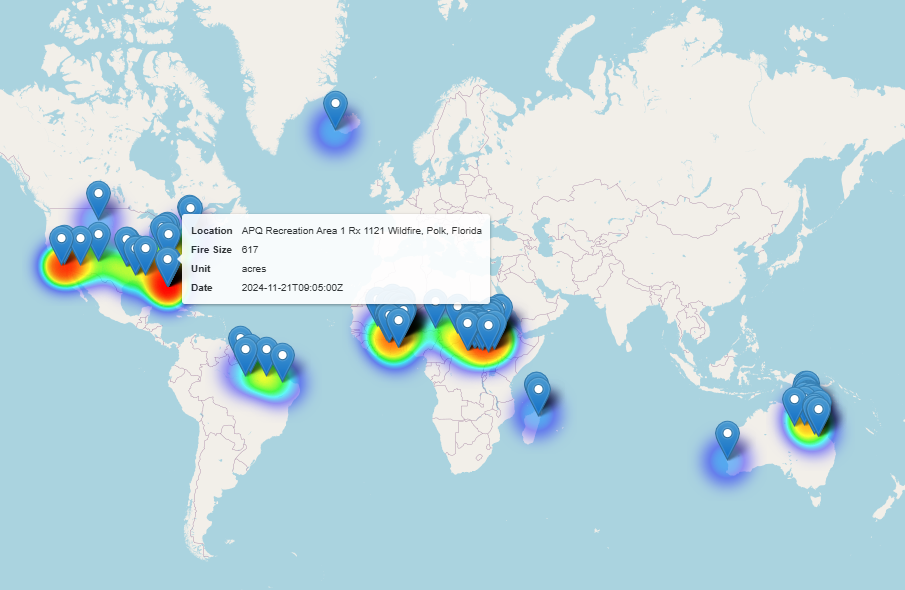

In [98]:
# 3) 영상처리
# 3-1) 위성이미지 분석
url = "https://wvs.earthdata.nasa.gov/?LAYERS=MODIS_Terra_CorrectedReflectance_TrueColor,MODIS_Terra_Thermal_Anomalies_Day&CRS=EPSG:4326&COORDINATES=35,125,38,128&FORMAT=image/jpeg&AUTOSCALE=TRUE&RESOLUTION=10km"

In [100]:
"""
# 라이브러리
import pandas as pd
import folium, requests
from folium.plugins import HeatMap
from geojson import Feature, FeatureCollection, Point

# 1) 산불 데이터 수집 
api_url = "https://eonet.gsfc.nasa.gov/api/v3/categories/wildfires?&status=open&days=30"

def get_wildfires_data(api_url):
    url = api_url
    res = requests.get(url)
    if res.status_code == 200:
        return res.json()
    else:
        return None

raw_data = get_wildfires_data(api_url)


features=[]
for event in raw_data['events']:
    i=0
    title = event.get('title')
    geometrices = event.get('geometry', [])

    for geom in geometrices:
        magni_value = geom.get('magnitudeValue')
        magni_unit = geom.get('magnitudeUnit')
        date = geom.get('date')
        lon = geom.get('coordinates')[0]
        lat = geom.get('coordinates')[1]

    features.extend([Feature(geometry=Point((lon, lat)), 
                            properties={'Title':title, 
                                        'MagnitudeValue':magni_value, 
                                        "MagnitudeUnit":magni_unit,
                                        "Date":date})])
    i+=1


# 여러 GeoJSON 하나로 묶기
geojson_data = FeatureCollection(features)

# 지도 생성
my_map = folium.Map(location=[31.450492, -17.080439], zoom_start=2)
# 지도에 산불 발생 위치 표시
folium.GeoJson(
    geojson_data, name="Worldwide Wildfires Data",
    tooltip=folium.GeoJsonTooltip(
        fields=['Title', 'MagnitudeValue', 'MagnitudeUnit', 'Date'],
        aliases=['Location', 'Fire Size', 'Unit', 'Date']
    )).add_to(my_map)
latlongs = [[feature['geometry']['coordinates'][1], 
             feature['geometry']['coordinates'][0], 
             feature['properties']['MagnitudeValue']
             if feature['properties']['MagnitudeValue'] != None else 0.1]
             for feature in features]

HeatMap(latlongs).add_to(my_map)

my_map.save("./results/my_map_WildFires.html")
"""

'\n\n\n# 라이브러리\nimport pandas as pd\nimport folium, requests\nfrom folium.plugins import HeatMap\nfrom geojson import Feature, FeatureCollection, Point\n\n# 1) 산불 데이터 수집 \napi_url = "https://eonet.gsfc.nasa.gov/api/v3/categories/wildfires?&status=open&days=30"\n\ndef get_wildfires_data(api_url):\n    url = api_url\n    res = requests.get(url)\n    if res.status_code == 200:\n        return res.json()\n    else:\n        return None\n\nraw_data = get_wildfires_data(api_url)\n\n\nfeatures=[]\nfor event in raw_data[\'events\']:\n    i=0\n    title = event.get(\'title\')\n    geometrices = event.get(\'geometry\', [])\n\n    for geom in geometrices:\n        magni_value = geom.get(\'magnitudeValue\')\n        magni_unit = geom.get(\'magnitudeUnit\')\n        date = geom.get(\'date\')\n        lon = geom.get(\'coordinates\')[0]\n        lat = geom.get(\'coordinates\')[1]\n\n    features.extend([Feature(geometry=Point((lon, lat)), \n                            properties={\'Title\':title, \n 

In [131]:
# 종합실습 ㅡ 리더님 코드
import pandas as pd
import folium, requests
from folium.plugins import HeatMap
from geojson import Feature, FeatureCollection, Point

# 데이터 전처리리
def get_fire_data():
    features = []
    api_url = "https://eonet.gsfc.nasa.gov/api/v3/events"
    params_={
        'category':'wildfires',
        'status':"open",
        # 'days':"20",
        'limit' : 1       # 데이터 구성형태 확인용 limit=1
        # 'limit' : 30
    }
    res = requests.get(api_url, params=params_)
    """ return res.json()       # 중간 데이터수신여부 확인
    {'title': 'EONET Events',
     'description': 'Natural events from EONET.',
     'link': 'https://eonet.gsfc.nasa.gov/api/v3/events',
     'events': [{'id': 'EONET_12148',
       'title': 'Rx Lamar 3440 Wildfire, Lamar, Texas',
       'description': None,
       'link': 'https://eonet.gsfc.nasa.gov/api/v3/events/EONET_12148',
       'closed': None,
       'categories': [{'id': 'wildfires', 'title': 'Wildfires'}],
       'sources': [{'id': 'IRWIN', 'url': 'https://irwin.doi.gov/observer/'}],
       'geometry': [{'magnitudeValue': 500.0,
         'magnitudeUnit': 'acres',
         'date': '2024-12-16T09:29:00Z',
         'type': 'Point',
         'coordinates': [-95.5874, 33.8451]}]}]}
    """
    api_data = res.json()
    events = api_data['events']

    for event in events:
        title = event['title']
        geometry = event['geometry']
        date = geometry[0]['date']
        magnitude = geometry[0]['magnitudeValue'] if 'magnitudeValue' is not None else 0.0

        features.append(
            Feature(geometry=Point((geometry[0]['coordinates'][0], geometry[0]['coordinates'][1])),
                    properties={'name': title, "magnitude": magnitude, "date":date})
        )
    """ return features       # 중간 데이터수집 여부 확인
    [{"geometry": {"coordinates": [-95.5874, 33.8451], "type": "Point"}, 
    "properties": {"date": "2024-12-16T09:29:00Z", "magnitude": 500.0, "name": "Rx Lamar 3440 Wildfire, Lamar, Texas"}, 
    "type": "Feature"}]
    """

    return FeatureCollection(features)

# 시각화
def fire_map():
    m = folium.Map(location=[42.125210, 73.707073], zoom_start=3)

    # geoJSON 데이터 가져오기
    fire_data = get_fire_data()

    folium.GeoJson(
        fire_data, name="화재 데이터",
        tooltip=folium.GeoJsonTooltip(
            fields=['name', 'magnitude', 'date'],
            aliases=['지역명', '면적', '날짜']
        )
    ).add_to(m)

    # 히트맵
    heat_data = [
        [features['geometry']['coordinates'][1], features['geometry']['coordinates'][0]]
        for feature in fire_data['features']
        if float(feature['properties']['magnitude']) >=1000
    ]
    HeatMap(heat_data).add_to(m)
    
    m.save("./results/Leader_WildFire.html")


# OpenCV 적용
# 위성 이미지 다운
def download_image():
    api_url = "https://wvs.earthdata.nasa.gov/api/v1/snapshot"
    params = {
        "REQUEST":"GetSnapshot",
        "BBOX":"-90, -180, 90, 180",
        "WIDTH":"1920",
        "HEIGHT":"1080",
        "FORMAT":"image/png",
        "LAYERS":"VIIRS_SNPP_CorrectedReflectance_TrueColor",
        "CRS":"EPSG:4326",
        "TIME":"2024-12-10"
    }
    res = requests.get(api_url, params=params, stream=True)  #
    print(res)
    with open("./raw data/NASA World SnapShot.png", "wb") as f:
        for chunk in res.iter_content(1024):
            f.write(chunk)
download_image()


# 
import cv2
def fire_result():
    image = cv2.imread("./raw data/NASA World SnapShot.png")
    if image is None:
        return print("이미지를 찾을 수 없습니다.")
    



# fire_map()

<>:43: SyntaxWarning: "is not" with 'str' literal. Did you mean "!="?
<>:43: SyntaxWarning: "is not" with 'str' literal. Did you mean "!="?
C:\Users\praye\AppData\Local\Temp\ipykernel_30240\142604387.py:43: SyntaxWarning: "is not" with 'str' literal. Did you mean "!="?
  magnitude = geometry[0]['magnitudeValue'] if 'magnitudeValue' is not None else 0.0


<Response [200]>


In [115]:
# 딕셔너리 .get() 메서드 사용
data = {'events':['이벤트1', '이벤트2']}
data.get("events", [{}])      # 두번째 매개변수 : 반환할 값이 없을때 반환할 기본값을 빈 리스트로 설정한 것
# key가 존재하지 않을 때의 KeyError 방지 목적
# ['이벤트1', '이벤트2']


['이벤트1', '이벤트2']